In [36]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import requests
import json

from scipy.stats import linregress
from citipy import citipy
from api_key import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


653


In [38]:
#city list needs to be fixed to be able to build URLs without empty spaces for those cities with two or more words in their name. The character %20 will be added
cities_for_url=[]

for a in cities:
    b=a.replace(" ","%20")
    cities_for_url.append(b)
    
cities_for_url

['severo-kurilsk',
 'butaritari',
 'ushuaia',
 'dikson',
 'san%20patricio',
 'cape%20town',
 'bilma',
 'taolanaro',
 'yellowknife',
 'barrow',
 'mollendo',
 'mys%20shmidta',
 'granville',
 'sveti%20nikole',
 'mar%20del%20plata',
 'rikitea',
 'kota%20belud',
 'belushya%20guba',
 'kahului',
 'grindavik',
 'lebu',
 'kamoke',
 'goundam',
 'narsaq',
 'hambantota',
 'pisco',
 'whitianga',
 'bubaque',
 'kapaa',
 'kavieng',
 'nikolskoye',
 'puerto%20ayora',
 'paamiut',
 'bambous%20virieux',
 'mahebourg',
 'bredasdorp',
 'vaini',
 'cabedelo',
 'new%20norfolk',
 'chipata',
 'qaanaaq',
 'aklavik',
 'bluff',
 'punta%20arenas',
 'opuwo',
 'busselton',
 'vaitupu',
 'morondava',
 'jamestown',
 'pimentel',
 'caconda',
 'cimarron%20hills',
 'port%20keats',
 'ostrovnoy',
 'hermanus',
 'albany',
 'tunduru',
 'chuy',
 'tabas',
 'kropotkin',
 'faanui',
 'san%20cristobal',
 'bengkulu',
 'constitucion',
 'sirnak',
 'port%20alfred',
 'jorhat',
 'chokurdakh',
 'maldonado',
 'skalistyy',
 'mataura',
 'sindor',


In [34]:


#This will allow to bring the right units
units="imperial"

#Creating empty lists to fill up as the requests are done inside a loop
latitude=[]
longitude=[]
temp=[]
humidity=[]
wind=[]
cloud=[]
city_name=[]

#counter to determine how many cities from "citipy" are not found in "openweathermap.com"
i=1

#creating URLs to request weather data
for name in cities_for_url:
    url='http://api.openweathermap.org/data/2.5/weather?q='
    query_url = f'{url}{name}&appid={api_key}&units={units}'
    
    response = requests.get(query_url)
    response_json = response.json()
     
    # An exception code block has to be created since the city list is built from a different site and we don't know if the same cities can be found in the second site 
    try:
        latitude.append(response_json['coord']['lat'])
        longitude.append(response_json['coord']['lon'])
        temp.append(response_json['main']['temp'])
        humidity.append(response_json['main']['humidity'])
        wind.append(response_json['wind']['speed'])
        cloud.append(response_json['clouds']['all'])
        city_name.append(response_json['name'])
    except KeyError:
        i=i+1
print(f'there are {i} cities not found')

there are 52 cities not found


In [35]:
#Creating a dictionary with the required variables to later make it a data frame
weather_dict={"Latitude":latitude,
             "Longitude":longitude,
              "Temp (F)":temp,
             "Humidity (%)":humidity,
             "Windspeed (mph)":wind,
             "Cloudiness (%)":cloud,
             "City":city_name}
weather_df=pd.DataFrame(weather_dict)
weather_df

,Latitude,Longitude,Temp (F),Humidity (%),Windspeed (mph),Cloudiness (%),City
0,65.6145,-37.6368,32.00,93,26.46,90,Tasiilaq
1,-0.8833,131.2500,81.64,75,3.89,100,Sorong
2,-17.8333,-149.2667,82.20,78,10.36,90,Teahupoo
3,45.1667,10.7833,46.38,87,11.99,91,Province of Mantua
4,71.6872,128.8694,-22.59,86,3.78,37,Tiksi
...,...,...,...,...,...,...,...
550,-32.2500,148.6167,80.60,36,10.36,40,Dubbo
551,53.9667,121.9667,-1.21,86,3.47,55,Yerofey Pavlovich
552,-14.3047,-43.7650,73.11,62,2.82,85,Carinhanha
553,45.0134,38.3379,47.01,49,5.99,24,Mingrelskaya


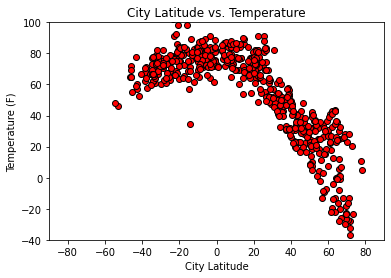

In [6]:
#creating scatter plot for temperature and latitude
plt.scatter(latitude, temp, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.ylim(-40,100)

plt.show()

In [7]:
#Comment: The above plot shows the following:
# a) The highest temperatures are indeed reached around the Ecuator or latitude zero
# b) Northern hemisphere latitudes have much lower temperatures compared to southern cities 

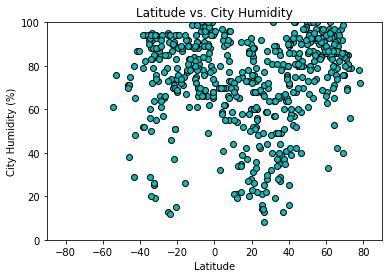

In [8]:
#creating scatter plot for humidity and latitude

plt.scatter(latitude, humidity, marker="o", facecolors="c", edgecolors="black")
plt.title("Latitude vs. City Humidity")
plt.ylabel("City Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(0,100)

plt.show()

In [9]:
#Comment: humidity seems to be more spread on northern cities compared to negative latitudes. South of the Ecuator seems to have more uniform high humidity.

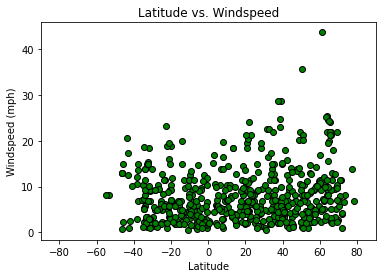

In [10]:
##creating scatter plot for humidity and latitude

plt.scatter(latitude, wind, marker="o", facecolors="g", edgecolors="black")
plt.title("Latitude vs. Windspeed")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,90)

plt.show()

In [11]:
#Comment: Overall wind speeds around 5 mph seems to have the highes frequency. Northern emisphere tends to have windier conditions as cities are further north 

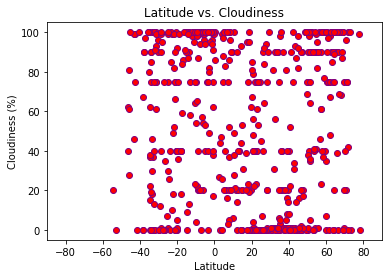

In [12]:
##creating scatter plot for cloudiness and latitude

plt.scatter(latitude, cloud,  marker="o", facecolors="r", edgecolors="purple")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)

plt.show()

In [13]:
#Comment:latitudes between -40 and -20 have a wide range of cloudiness. Betweeen -20 and 0, tend to be more overcasted. Passing the Ecuator until latitude +20, 
#cities have to be less cloudy and beyond +20 further north, cities tend to be more cloudy. This trend might be seasonal. Data pulled at the end of Feb. 

In [14]:
#breaking the data set into northern and souther cities
n_lat=[]
s_lat=[]
for var in latitude:
    if var>=0:
       n_lat.append(var)
    else:
        s_lat.append(var)
len(n_lat)

358

In [15]:
#Creating a data frame for the northern cities
n_lat_df=pd.DataFrame(n_lat)
n_lat_df["Latitude"]=n_lat_df
n_lat_df
north_df=pd.merge(weather_df,n_lat_df, on="Latitude")
north_df

,Latitude,Longitude,Temp (F),Humidity (%),Windspeed (mph),Cloudiness (%),City,0
0,65.6145,-37.6368,24.80,42,24.16,90,Tasiilaq,65.6145
1,45.1667,10.7833,37.38,80,3.44,0,Province of Mantua,45.1667
2,71.6872,128.8694,-28.12,85,3.91,100,Tiksi,71.6872
3,33.1940,-82.5271,41.00,89,11.50,90,Avera,33.1940
4,73.5069,80.5464,-23.24,79,8.16,0,Dikson,73.5069
...,...,...,...,...,...,...,...,...
355,53.6039,91.3903,19.40,73,4.47,40,Belyy Yar,53.6039
356,40.8106,111.6522,42.80,42,4.47,0,Hohhot,40.8106
357,53.2677,37.3569,21.11,95,11.30,41,Korsakovo,53.2677
358,53.9667,121.9667,1.22,85,3.02,100,Yerofey Pavlovich,53.9667


In [16]:
#Creating a data frame for the southern cities
s_lat_df=pd.DataFrame(s_lat)
s_lat_df["Latitude"]=s_lat_df
s_lat_df
south_df=pd.merge(weather_df,s_lat_df, on="Latitude")
south_df

,Latitude,Longitude,Temp (F),Humidity (%),Windspeed (mph),Cloudiness (%),City,0
0,-0.8833,131.2500,83.35,65,6.53,62,Sorong,-0.8833
1,-17.8333,-149.2667,84.09,74,5.75,40,Teahupoo,-17.8333
2,-9.8000,-139.0333,79.93,75,12.55,4,Atuona,-9.8000
3,-24.7911,-50.0119,62.78,95,4.88,99,Castro,-24.7911
4,-21.2078,-159.7750,78.80,89,3.44,75,Avarua,-21.2078
...,...,...,...,...,...,...,...,...
192,-28.6150,-49.0256,72.48,92,1.99,100,Jaguaruna,-28.6150
193,-3.7481,-73.2472,73.40,100,3.44,75,Iquitos,-3.7481
194,-32.2500,148.6167,82.40,26,6.91,40,Dubbo,-32.2500
195,-14.3047,-43.7650,68.94,81,4.97,99,Carinhanha,-14.3047


The r-squared is: 0.7859241535038394


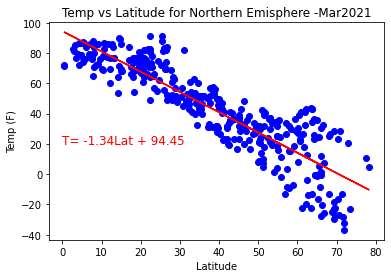

In [17]:
#Scatter plot for Northern cities - latitude vs Temp
xn_values=north_df["Latitude"]
yn_values=north_df["Temp (F)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"T= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="blue")
plt.title("Temp vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp (F)')
plt.savefig("../WeatherPy/images/temp_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [18]:
#Comment: negative correlation between latitude and Temp for the northern cities. Good linear fit with a r-squared above 0.7. The further from the Ecuator, 
#the colder the city

The r-squared is: 0.20903008133718193


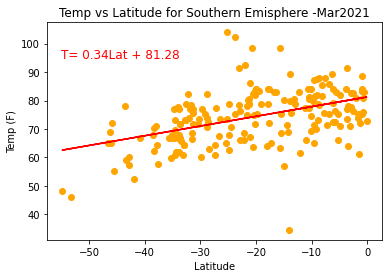

In [19]:
#Scatter plot for Southern cities - latitude vs Temp
xs_values=south_df["Latitude"]
ys_values=south_df["Temp (F)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"T= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="orange")
plt.title("Temp vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp (F)')
plt.savefig("../WeatherPy/images/temp_lat_south.png")

#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [20]:
#Comment: For southern cities, temperatures are more scattered. The r-sq coefficient demonstrates it with a lower value. The regression is positive, indicating that
#there's a maximum around latitude zero, since in the northern cities the regression is negative. Also, it can be seen that the regression slope is more horizontal. 
#This concludes that temperatures tend to be warmer even further south.

The r-squared is: 0.14699179195012949


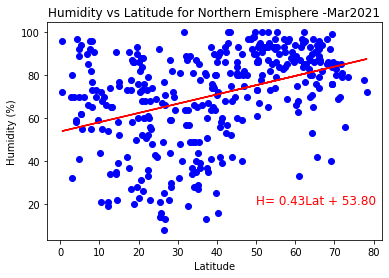

In [21]:
xn_values=north_df["Latitude"]
yn_values=north_df["Humidity (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"H= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="blue")
plt.title("Humidity vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../WeatherPy/images/humidity_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [22]:
#Comment: positive correlation between northern cities and humidity. The further north, the higher the humidity. Fit is not great due to spread of low humidity values. 

The r-squared is: 0.04785504820544634


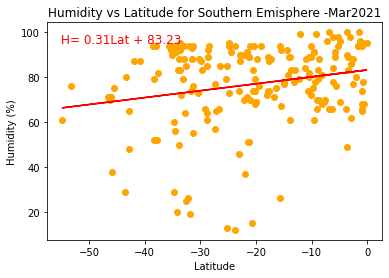

In [23]:
xs_values=south_df["Latitude"]
ys_values=south_df["Humidity (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"H= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="orange")
plt.title("Humidity vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../WeatherPy/images/humidity_lat_south.png")

#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [24]:
#Comment: Correlation seems to be independent between northern and southern cities. Both emispheres have similar slope and the r-sq is also similar. 

The r-squared is: 0.017963814846746085


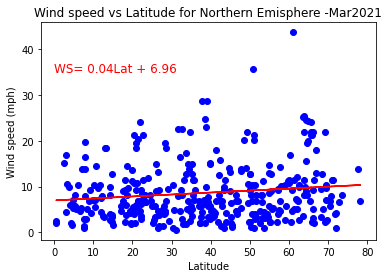

In [25]:
#Plot for wind speed northern emisphere
xn_values=north_df["Latitude"]
yn_values=north_df["Windspeed (mph)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"WS= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="blue")
plt.title("Wind speed vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')
plt.savefig("../WeatherPy/images/wind_speed_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [26]:
#Comment: the wind speed is slightly higher at more positive latitudes. Overall tends to range between 1 and 5 mph with some windy cities. Regression is positive with
#a small slope (0.03). Fit is poor due to effect of windy cities. There is a cluster of cities close to the Ecuator with wind speeds in the dominant range.

The r-squared is: 0.05822069706313855


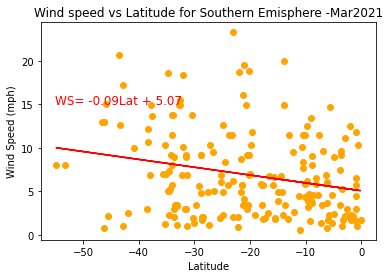

In [27]:
#Plot for wind speed southern emisphere
xs_values=south_df["Latitude"]
ys_values=south_df["Windspeed (mph)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"WS= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="orange")
plt.title("Wind speed vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../WeatherPy/images/wind_speed_lat_south.png")
#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.show()


In [28]:
#Comment: Regression is negative in the Southern emisphere. It's positive in the Northern. This indicates that there's a minimum in the trend around latitud zero.
#Slope is more negative compared to the slope of the northern emisphere. Again, a cluster of cities around the Ecuator can be seen in this plot. 

The r-squared is: 0.04768643343955034


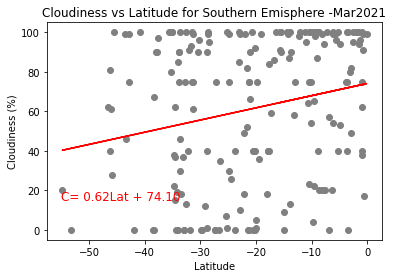

In [29]:
#Plot for Cloudiness southern emisphere
xs_values=south_df["Latitude"]
ys_values=south_df["Cloudiness (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"C= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="gray")
plt.title("Cloudiness vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../WeatherPy/images/cloud_lat_south.png")
#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [30]:
#Comment: positive linear regression. Consistent with more clouds as we move further north. Poor linear fit, cloudiness spread around. 

The r-squared is: 0.05719634781611208


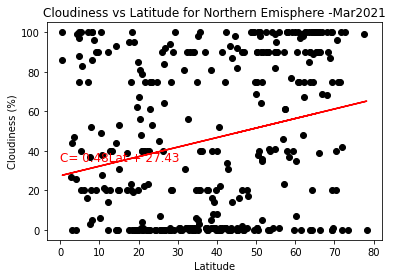

In [31]:
#Plot for wind speed northern emisphere
xn_values=north_df["Latitude"]
yn_values=north_df["Cloudiness (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"C= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="black")
plt.title("Cloudiness vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../WeatherPy/images/cloud_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [32]:
#Comment: positive linear regression. Consistent with more clouds as we move further north. Poor linear fit, cloudiness spread around. Analyzing both hemisphere by
#by separate, trends is always positive and slope is similar. Conclusion is that regardless of the fit, cloudiness seems to be greater as we move north. 

In [33]:
weather_df.to_csv(r'C:/Users/oscar/Desktop/Repos/python-api-challenge/WeatherPy/csv/weather_lat_data.csv')